In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
from re import sub


def snake_case(s):
    return "_".join(
        sub(
            "([A-Z][a-z]+)", r" \1", sub("([A-Z]+)", r" \1", s.replace("-", " "))
        ).split()
    ).lower()

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

# py.offline.init_notebook_mode(connected=True)
# from plotly.offline import iplot

# pd.options.plotting.backend = "plotly"

# import seaborn as sns
# import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"
import plotly.graph_objects as go


<IPython.core.display.Javascript object>

In [5]:
%%time
df = pd.read_csv('meeting_date_with_semester_append.csv')

<timed exec>:1: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 40.2 s, sys: 12 s, total: 52.2 s
Wall time: 54.6 s


<IPython.core.display.Javascript object>

In [6]:
# df.GRADE_LEVEL.value_counts()

<IPython.core.display.Javascript object>

In [7]:
# fix grade_level
grade_list = list(pd.unique(df.GRADE_LEVEL))
grade_list = list(map(lambda x: str(x), grade_list))
mapping_dict = {k: snake_case(k) for v, k in enumerate(grade_list)}

<IPython.core.display.Javascript object>

In [8]:
# mapping_dict

<IPython.core.display.Javascript object>

In [9]:
df.GRADE_LEVEL = df.GRADE_LEVEL.map(mapping_dict)

<IPython.core.display.Javascript object>

In [10]:
df.GRADE_LEVEL.value_counts()

\_n    1085329
9       248443
10      193940
11      188259
12      137992
1        79015
7        78452
6        75424
8        75123
2        64028
4        58974
5        57334
3        56699
0        52388
99         869
Name: GRADE_LEVEL, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
df.SCHOOLYEAR.value_counts()

2020    7314177
2021    1634812
2018     923360
2013     885267
2014     858874
2015     801510
2017     800820
2019     734228
2016     639765
Name: SCHOOLYEAR, dtype: int64

<IPython.core.display.Javascript object>

In [12]:
df_2019 = df[df.SCHOOLYEAR == 2019]

<IPython.core.display.Javascript object>

In [13]:
df_2019.GRADE_LEVEL.value_counts()

1     12095
0     11712
10     8079
4      7276
2      7065
9      6913
3      6897
11     6891
12     6725
5      6623
7      5034
8      4976
6      4598
99      103
Name: GRADE_LEVEL, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
df_2019_grade_12 = df_2019[df_2019.GRADE_LEVEL == "12"]

<IPython.core.display.Javascript object>

In [15]:
df_2019_grade_12.SCHOOLDCID.value_counts()

4759    3010
4279    1457
4716    1230
4710     637
4764     391
Name: SCHOOLDCID, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df_2019_grade_12_school = df_2019_grade_12[df_2019_grade_12.SCHOOLDCID == 4759]

<IPython.core.display.Javascript object>

In [17]:
df_2019_grade_12_school.TERM_NAME.value_counts()

Semester 1    2092
Semester 2     695
\N             183
2019-2020       40
Name: TERM_NAME, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='TERM_NAME'>

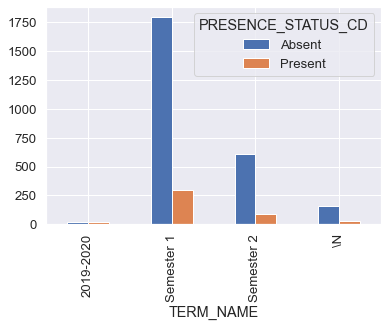

<IPython.core.display.Javascript object>

In [18]:
df_2019_grade_12_school.groupby(["TERM_NAME", "PRESENCE_STATUS_CD"])[
    "PRESENCE_STATUS_CD"
].count().unstack().plot(kind="bar")

In [19]:
df_2019_grade_12_school.COURSE_NAME.value_counts()

Amer Hist: Founding Prin, Civics & Econ    306
Adv Functions & Modeling                   281
English IV                                 196
Amer His: Found Prin, Civ & Econ Honors    153
AP English Literature and Composition      150
                                          ... 
American History I Honors                    1
ROTC II                                      1
English II                                   1
Introduction to Criminal Justice             1
Band (Proficient) Honors Spring              1
Name: COURSE_NAME, Length: 101, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
df_2019_grade_12_school_course = df_2019_grade_12_school[
    df_2019_grade_12_school.COURSE_NAME == "Amer Hist: Founding Prin, Civics & Econ"
]

<IPython.core.display.Javascript object>

In [22]:
df_2019_grade_12_school_course.groupby(["STUDENTID", "PRESENCE_STATUS_CD"])[
    "PRESENCE_STATUS_CD"
].count().unstack()

PRESENCE_STATUS_CD,Absent,Present
STUDENTID,,
54528,3.0,NaN
69494,2.0,NaN
69520,1.0,1.0
69567,6.0,1.0
70291,11.0,1.0
...,...,...
213689,3.0,NaN
215455,2.0,NaN
219652,3.0,NaN


<IPython.core.display.Javascript object>

In [23]:
# df_2019_grade_12_school_course.groupby(["STUDENTID", "PRESENCE_STATUS_CD"])[
#     "PRESENCE_STATUS_CD"
# ].count().unstack().plot(kind="scatter")

<IPython.core.display.Javascript object>

In [26]:
# df_2019_grade_12_school_course.groupby(["STUDENTID", "PRESENCE_STATUS_CD"])[
#     "PRESENCE_STATUS_CD"
# ].count().unstack()["Absent"].plot(kind="scatter")

<IPython.core.display.Javascript object>

<AxesSubplot:>

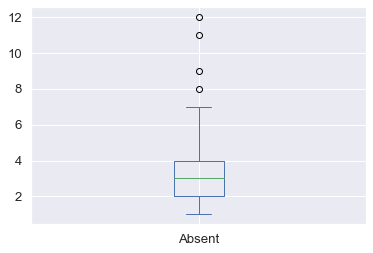

<IPython.core.display.Javascript object>

In [25]:
df_2019_grade_12_school_course.groupby(["STUDENTID", "PRESENCE_STATUS_CD"])[
    "PRESENCE_STATUS_CD"
].count().unstack()["Absent"].plot(kind="box")